In [1]:
# instal roboflow and yoloV5
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

Cloning into 'yolov5'...
remote: Enumerating objects: 15291, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15291 (delta 0), reused 1 (delta 0), pack-reused 15287
Receiving objects: 100% (15291/15291), 14.19 MiB | 24.59 MiB/s, done.
Resolving deltas: 100% (10489/10489), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 2.0 MB/s eta 0:

In [2]:
import torch
import os
print(f'using torch{torch.__version__}({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else "cpu"})')

using torch1.13.1+cu116(Tesla T4)


## This Model contains 143 training set and 18 validation set and 10 test set and also use Augmentations

In [3]:
from roboflow import Roboflow
# Select the model(yolov5) from roboflow
rf=Roboflow(model_format='yolov5',notebook='ultralytics')

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [4]:
#make a folder for saving train validate and test sets and their labels that these created in roboflow
os.environ['DATASET_DIRECTORY']='/content/datasets'

In [5]:
# use personal API key from Roboflow account
rf = Roboflow(api_key='....')
# The workSpace for project that be create in Roboflow
project = rf.workspace().project("cat-detection-l7eof")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/cat-detection-1 in yolov5pytorch:: 100%|██████████| 354/354 [00:00<00:00, 2874.85it/s]


In [6]:
# Train the dataset with 16 batches and 100 epochs
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/cat-detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-117-g85f6019 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

# Prediction

In [7]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/cat-detection-1/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-117-g85f6019 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/18 /content/datasets/cat-detection-1/valid/images/cat-4004_jpg.rf.73183fca32002c34c308172bdb00734a.jpg: 416x416 1 cat, 11.9ms
image 2/18 /content/datasets/cat-detection-1/valid/images/cat-4006_jpg.rf.962aac30251b99d31c067540fc4c02a5.jpg: 416x416 2 cats, 11.2ms
image 3/18 /content/datasets/cat-detection-1/valid/

# Display the test images

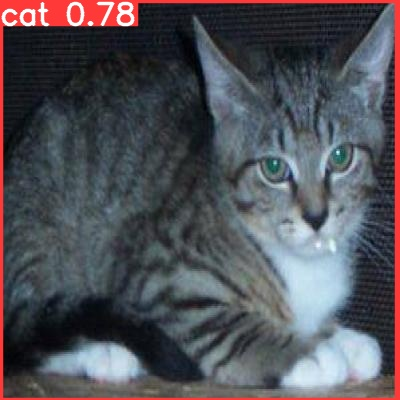

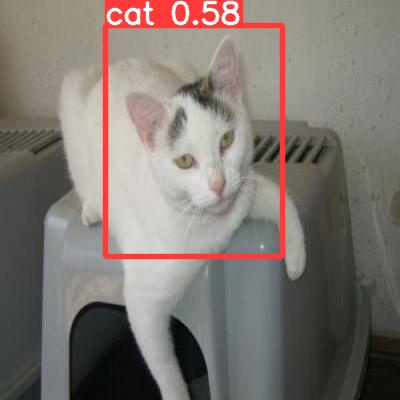

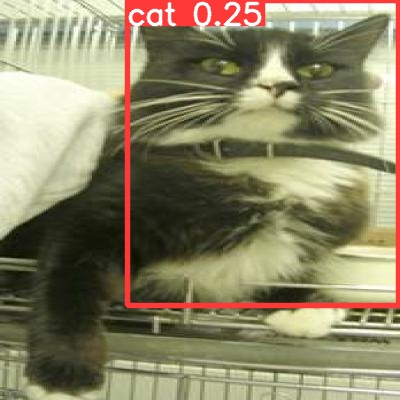

In [8]:
import glob
import cv2
folder='/content/yolov5/runs/detect/exp/*.jpg'
i=0
from IPython.display import Image,clear_output
for images in glob.glob(folder):
  i+=1
  if i<4:
    display(Image(filename=images))
    print('\n')
